In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np
import warnings
import glob, os, shutil
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:/Users/robin/Programs/Candy_Collect/Grant/Database/Dip_Data')

In [3]:
df_dips = pd.read_csv('temp\SBR_dips.csv')

In [4]:
df_dips

,ex1,ex2,ex3,ex4,ex5
0,1.011766,1.020856,1.021494,1.006860,1.013893
1,1.135167,1.242562,1.108572,1.120134,1.271792


In [5]:
df_dips['avg'] = df_dips[['ex1', 'ex2', 'ex3', 'ex4', 'ex5']].mean(axis=1)
df_dips['stnd'] = df_dips[['ex1', 'ex2', 'ex3', 'ex4', 'ex5']].std(axis=1)
df_dips['err'] = df_dips['stnd']/(5**.5)
df_dips['threshold'] = df_dips.avg[0] + 3*df_dips.stnd[0]
df_dips['bacterial_load'] = [0, 1*10**6]

In [6]:
df_dips.iloc[1][0:5]

ex1    1.135167
ex2    1.242562
ex3    1.108572
ex4    1.120134
ex5    1.271792
Name: 1, dtype: float64

In [7]:
os.chdir('C:/Users/robin/Programs/Candy_Collect/Grant/Database/')

In [8]:
df_C = pd.read_csv('SBR_C.csv')

In [9]:
df_C['avg'] = df_C[['N1', 'N2', 'N3', 'N4']].mean(axis=1)
df_C['stnd'] = df_C[['N1', 'N2', 'N3', 'N4']].std(axis=1)
df_C['err'] = df_C['stnd']/2
df_C['threshold'] = df_C.avg[0] + 3*df_C.stnd[0]
df_C['bacterial_load'] = [0, 1*10**5, 1.5*10**5, 5*10**5, 1*10**6, 5*10**6, 1*10**7, 1*10**9]

In [10]:
df_C.iloc[4][:4]

N1    1.082572
N2    1.094621
N3    1.100004
N4    1.125345
Name: 4, dtype: float64

In [11]:
df_C.avg[4]

1.100635515994519

In [12]:
df_K = pd.read_csv('SBR_K.csv')

In [13]:
df_K['avg'] = df_K[['N1', 'N2', 'N3', 'N4']].mean(axis=1)
df_K['stnd'] = df_K[['N1', 'N2', 'N3', 'N4']].std(axis=1)
df_K['err'] = df_K['stnd']/2
df_K['threshold'] = df_K.avg[0] + 3*df_K.stnd[0]
df_K['bacterial_load'] = [0, 1*10**5, 1.5*10**5, 5*10**5, 1*10**6, 5*10**6, 1*10**7, 1*10**9]

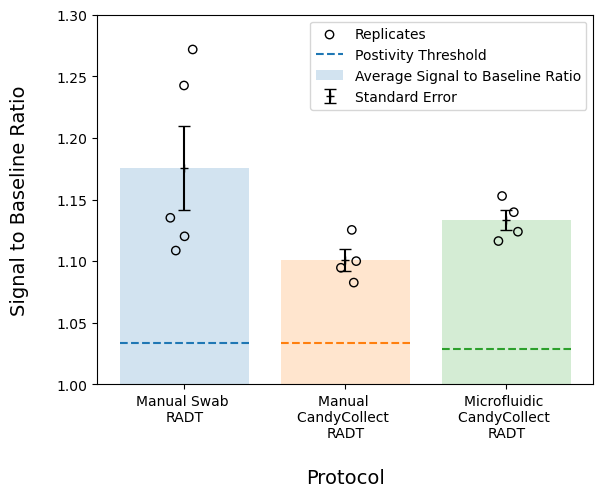

In [14]:
plt.bar(x = 'Manual Swab \nRADT', y = df_dips.avg.iloc[1], height = -df_dips.avg.iloc[1], alpha = 0.2, label = 'Average Signal to Baseline Ratio')
# plt.plot([-.4, .4], [df_dips.threshold[0], df_dips.threshold[1]], '--', label ='Postivity Threshold')
plt.errorbar('Manual Swab \nRADT', df_dips.avg.iloc[1], yerr=df_dips.stnd.iloc[1]/(5**.5), fmt="+", color="k", capsize = 4, label = 'Standard Error')
plt.scatter(x = np.random.normal(0, 0.05, (5,)), y = df_dips.iloc[1][0:5], facecolors='none', color = 'k', label = 'Replicates')
plt.plot([-.4, .4], [df_dips.threshold[0], df_dips.threshold[1]], '--', label ='Postivity Threshold')

plt.bar(x = 'Manual \nCandyCollect \nRADT', y = df_C.avg.iloc[4], height = -df_dips.avg.iloc[1], alpha = 0.2)
plt.plot([.6, 1.4], [df_C.threshold[0], df_C.threshold[0]], '--')
plt.errorbar('Manual \nCandyCollect \nRADT', df_C.avg.iloc[4], yerr=df_C.stnd.iloc[4]/(4**.5), fmt="+", color="k", capsize = 4)
plt.scatter(x = np.random.normal(1, 0.05, (4,)), y = df_C.iloc[4][:4], facecolors='none', color = 'k')

plt.bar(x = 'Microfluidic \nCandyCollect \nRADT', y = df_K.avg.iloc[4], height = -df_dips.avg.iloc[1], alpha = 0.2)
plt.plot([1.6, 2.4], [df_K.threshold[0], df_K.threshold[0]], '--')
plt.errorbar('Microfluidic \nCandyCollect \nRADT', df_K.avg.iloc[4], yerr=df_K.stnd.iloc[4]/(4**.5), fmt="+", color="k", capsize = 4)
plt.scatter(x = np.random.normal(2, 0.05, (4,)), y = df_K.iloc[4][:4], facecolors='none', color = 'k')

plt.ylabel('Signal to Baseline Ratio\n', fontsize = 14)
plt.xlabel('\nProtocol', fontsize = 14)
plt.ylim(1, 1.3)
plt.legend()
plt.savefig('test.svg')

In [15]:
df_K

,N1,N2,N3,N4,avg,stnd,err,threshold,bacterial_load
0,1.019125,1.009560,1.006170,1.013262,1.012029,0.005547,0.002773,1.028669,0.000000e+00
1,1.021403,1.021977,1.011886,1.048493,1.025940,0.015731,0.007866,1.028669,1.000000e+05
2,1.036018,1.048769,1.014381,1.030264,1.032358,0.014263,0.007131,1.028669,1.500000e+05
3,1.046402,1.082580,1.065127,1.115157,1.077316,0.029234,0.014617,1.028669,5.000000e+05
4,1.139720,1.152858,1.123884,1.116305,1.133192,0.016342,0.008171,1.028669,1.000000e+06
5,1.379373,1.346640,1.275544,1.474706,1.369066,0.082695,0.041347,1.028669,5.000000e+06
6,1.356132,1.314295,1.350125,1.380861,1.350353,0.027474,0.013737,1.028669,1.000000e+07
7,1.409385,1.414890,1.415028,1.305038,1.386085,0.054095,0.027048,1.028669,1.000000e+09
